In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/unsw-nb15/UNSW-NB15_3.csv
/kaggle/input/unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/unsw-nb15/NUSW-NB15_features.csv


In [2]:
import pandas as pd

In [3]:
data1=pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_1.csv', header = None)
data1.head()
data1.columns

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
           dtype='int64')

In [4]:
data2=pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_2.csv', header = None)
data3=pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_3.csv', header = None)
data4=pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_4.csv', header = None)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3,39,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Features :

In [5]:

data_features=pd.read_csv('/kaggle/input/unsw-nb15/NUSW-NB15_features.csv', encoding='ISO-8859-1')
data_features.head()
#data_features.columns

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [ ]:
data_features['Name']

In [ ]:
data_features.columns

events :

In [6]:
data_events=pd.read_csv('/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv')
data_events.head()

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245


In [8]:
dfs = []
dfs.append(data1)
dfs.append(data2)
dfs.append(data3)
dfs.append(data4)
all_data = pd.concat(dfs)#.reset_index(drop=True)  # Concat all to a single df
all_data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [10]:
data_features['Name'] = data_features['Name'].apply(lambda x: x.strip().replace(' ', '').lower())# Renaming our dataframe with proper column names
all_data.columns = data_features['Name']


In [11]:
all_data

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


In [ ]:
all_data.columns

In [12]:
all_data['proto'].value_counts()

tcp     1495074
udp      990435
unas      16202
arp       10064
ospf       7798
         ...   
3pc         137
igmp         64
udt           8
rtp           7
esp           2
Name: proto, Length: 135, dtype: int64

In [13]:
all_data['service'].unique()

array(['dns', '-', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3',
       'snmp', 'ssl', 'irc', 'radius', 'dhcp'], dtype=object)

In [14]:
all_data['service'].value_counts()

-           1246397
dns          781668
http         206273
ftp-data     125783
smtp          81645
ftp           49090
ssh           47160
pop3           1533
dhcp            172
ssl             142
snmp            113
radius           40
irc              31
Name: service, dtype: int64

In [15]:
all_data['label'].value_counts()

0    2218764
1     321283
Name: label, dtype: int64

<AxesSubplot:>

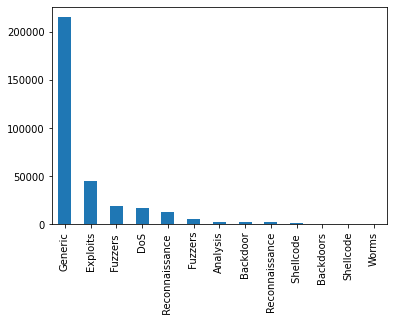

In [16]:
import matplotlib.pyplot as plt
all_data['attack_cat'].value_counts().plot(kind="bar")

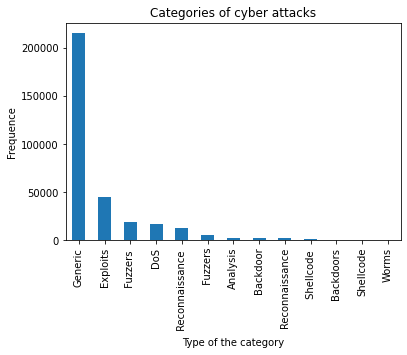

In [17]:
all_data['attack_cat'].value_counts().plot(kind="bar")

plt.title("Categories of cyber attacks")
plt.xlabel("Type of the category")
plt.ylabel("Frequence")

plt.show()

In [ ]:
all_data['dloss']

Numeric columns & categorical columns :

In [18]:
num_cols = all_data._get_numeric_data().columns.tolist()
 #num_cols
print(len(num_cols),num_cols)

40 ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label']


In [19]:
cat_cols=[i for i in all_data.columns if all_data.dtypes[i]=='object']

print(len(cat_cols),cat_cols)

9 ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'ct_ftp_cmd', 'attack_cat']


In [20]:
data_basic_features=all_data[['service', 'state', 'spkts', 'dpkts', 'sbytes','dbytes', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'label']]
#category=data[['attack_cat']]
#data_basic_features_plus_cat=pd.concat([data_basic_features, category])
#type(data_basic_features)
data_basic_features

Name,service,state,spkts,dpkts,sbytes,dbytes,sttl,dttl,sload,dload,sloss,dloss,label
0,dns,CON,2,2,132,164,31,29,500473.937500,621800.937500,0,0,0
1,-,CON,4,4,528,304,31,29,87676.085940,50480.171880,0,0,0
2,dns,CON,2,2,146,178,31,29,521894.531300,636282.375000,0,0,0
3,dns,CON,2,2,132,164,31,29,436724.562500,542597.187500,0,0,0
4,dns,CON,2,2,146,178,31,29,499572.250000,609067.562500,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,ftp-data,FIN,6,8,320,1828,31,29,24465.671880,146610.765600,1,2,0
440040,ftp,CON,8,6,456,346,31,29,8743.816406,6333.240234,2,2,0
440041,ftp,CON,32,30,1802,2088,31,29,2204.839844,2549.582764,7,9,0
440042,http,CON,58,116,3498,166054,31,29,12496.513670,598375.062500,2,57,0


In [21]:
db=data_basic_features.copy()
db1=db[db["label"] == 1]

#normal =>0
#attack => 1
corr = db1.corr() 
corr.style.background_gradient(cmap='coolwarm')


/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


Name,spkts,dpkts,sbytes,dbytes,sttl,dttl,sload,dload,sloss,dloss,label
Name,,,,,,,,,,,
spkts,1.000000,0.318167,0.990711,0.117234,-0.102470,0.112583,-0.036824,0.051178,0.991411,0.114890,nan
dpkts,0.318167,1.000000,0.210761,0.976063,-0.171471,0.137706,-0.040667,0.411253,0.212840,0.976174,nan
sbytes,0.990711,0.210761,1.000000,0.009564,-0.069704,0.074452,-0.022018,0.000269,0.997152,0.006403,nan
dbytes,0.117234,0.976063,0.009564,1.000000,-0.129921,0.082355,-0.024273,0.412116,0.008133,0.999250,nan
sttl,-0.102470,-0.171471,-0.069704,-0.129921,1.000000,-0.568689,0.168923,-0.402234,-0.083346,-0.150438,nan
dttl,0.112583,0.137706,0.074452,0.082355,-0.568689,1.000000,-0.295202,0.265069,0.093895,0.103373,nan
sload,-0.036824,-0.040667,-0.022018,-0.024273,0.168923,-0.295202,1.000000,-0.078193,-0.027401,-0.030400,nan
dload,0.051178,0.411253,0.000269,0.412116,-0.402234,0.265069,-0.078193,1.000000,0.004693,0.417453,nan
sloss,0.991411,0.212840,0.997152,0.008133,-0.083346,0.093895,-0.027401,0.004693,1.000000,0.005716,nan


Correlation_matrix when there are no attacks !

In [22]:
db0=db[db["label"] == 0]
db0
corr = db0.corr() #data_basic_features_plus_cat.corr()
#corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm')

Name,spkts,dpkts,sbytes,dbytes,sttl,dttl,sload,dload,sloss,dloss,label
Name,,,,,,,,,,,
spkts,1.000000,0.965816,0.436992,0.882947,-0.095853,0.026020,-0.129720,0.174622,0.693962,0.934334,nan
dpkts,0.965816,1.000000,0.339548,0.971041,-0.077732,0.013006,-0.097370,0.099660,0.515640,0.993546,nan
sbytes,0.436992,0.339548,1.000000,0.265225,-0.029016,0.058611,-0.083862,-0.026278,0.647670,0.296535,nan
dbytes,0.882947,0.971041,0.265225,1.000000,-0.052850,0.004615,-0.063127,0.070567,0.311513,0.991058,nan
sttl,-0.095853,-0.077732,-0.029016,-0.052850,1.000000,0.494119,0.285798,-0.137060,-0.091385,-0.065939,nan
dttl,0.026020,0.013006,0.058611,0.004615,0.494119,1.000000,-0.269883,0.010548,0.057689,0.008285,nan
sload,-0.129720,-0.097370,-0.083862,-0.063127,0.285798,-0.269883,1.000000,-0.156719,-0.153671,-0.080439,nan
dload,0.174622,0.099660,-0.026278,0.070567,-0.137060,0.010548,-0.156719,1.000000,0.103791,0.092920,nan
sloss,0.693962,0.515640,0.647670,0.311513,-0.091385,0.057689,-0.153671,0.103791,1.000000,0.419640,nan


# Content features :

In [23]:
# est ce que 'smeansz','dmeansz' == 'smean', 'dmean'
#response_body_len == 'res_bdy_len'
data_content_features=all_data[['swin','dwin','stcpb','dtcpb','smeansz', 'dmeansz','trans_depth','res_bdy_len','label']] #'attack_cat'
data_content_features

Name,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,label
0,0,0,0,0,66,82,0,0,0
1,0,0,0,0,132,76,0,0,0
2,0,0,0,0,73,89,0,0,0
3,0,0,0,0,66,82,0,0,0
4,0,0,0,0,73,89,0,0,0
...,...,...,...,...,...,...,...,...,...
440039,255,255,4035116044,222196311,53,229,0,0,0
440040,255,255,1529727621,185369967,57,58,0,0,0
440041,255,255,497208793,889904111,56,70,0,0,0
440042,255,255,1289728069,3436097151,60,1432,1,79745,0


In [ ]:
data_content_features['label'].value_counts() #unique()

In [ ]:
data_content_features['label'].unique()

In [ ]:

corr = data_content_features[data_content_features['label']==1].corr() #data_basic_features_plus_cat.corr()
#corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm')

En cas d'attaque => forte corrélation entre stcpb et swin , dwin . Meme chose pour dtcpb.
forte corrélation entre stcpb et dtcpb

In [ ]:
corr = data_content_features[data_content_features['label']==0].corr() #data_basic_features_plus_cat.corr()
#corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm')

Quand on n'a pas d'attaque : une moyenne corrélation entre dmeansz et (swin,dwin)

# Time FEATURES :

In [24]:
data_time_features=all_data[['sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt','synack', 'ackdat','label']]
data_time_features

Name,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,label
0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0
1,9.891010,10.682733,1421927414,1421927414,7.005000,7.564333,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,1421927414,1421927414,0.043000,0.014000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,1421927414,1421927414,0.005000,0.003000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
440039,1221.136547,30.096029,1424262068,1424262069,17.394400,12.405143,0.000608,0.000468,0.000140,0
440040,3961.093354,129.038367,1424262068,1424262069,51.976999,72.915602,0.000609,0.000477,0.000132,0
440041,13233.728560,379.052750,1424262062,1424262069,204.359814,214.372375,0.000617,0.000485,0.000132,0
440042,2868.893137,1951.035944,1424262067,1424262069,38.609700,19.133826,0.000680,0.000541,0.000139,0


In [ ]:
corr = data_time_features[data_time_features['label']==0].corr() #data_basic_features_plus_cat.corr()
#corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
corr = data_content_features[data_content_features['label']==1].corr() #data_basic_features_plus_cat.corr()
#corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm')

In [43]:
all_data['state'].value_counts()#.plot(kind="bar")

FIN    1478689
CON     560588
INT     490471
REQ       9043
RST        528
ECO        337
CLO        161
URH        108
ACC         43
PAR         30
TST          9
ECR          9
URN          8
no           8
MAS          8
TXD          7
Name: state, dtype: int64

In [35]:
all_data['is_sm_ips_ports']

0         0
1         0
2         0
3         0
4         0
         ..
440039    0
440040    0
440041    0
440042    0
440043    0
Name: is_sm_ips_ports, Length: 2540047, dtype: int64

In [37]:
#all_data['num_cols2']
cat_cols

['srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'service',
 'ct_ftp_cmd',
 'attack_cat']

**Partie Imporante**

In [25]:
A=all_data[['proto','state','service','attack_cat','label']]
A

Name,proto,state,service,attack_cat,label
0,udp,CON,dns,NaN,0
1,udp,CON,-,NaN,0
2,udp,CON,dns,NaN,0
3,udp,CON,dns,NaN,0
4,udp,CON,dns,NaN,0
...,...,...,...,...,...
440039,tcp,FIN,ftp-data,NaN,0
440040,tcp,CON,ftp,NaN,0
440041,tcp,CON,ftp,NaN,0
440042,tcp,CON,http,NaN,0


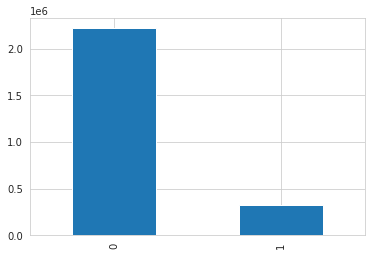

In [68]:
all_data['label'].value_counts().plot(kind="bar")
plt.savefig('Nombre des attacks dans la dataset.png')

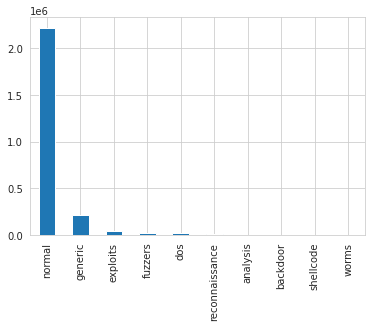

In [69]:
all_data['attack_cat'].value_counts().plot(kind="bar")
plt.savefig('Type et nombre de chaque attack.png')

<AxesSubplot:>

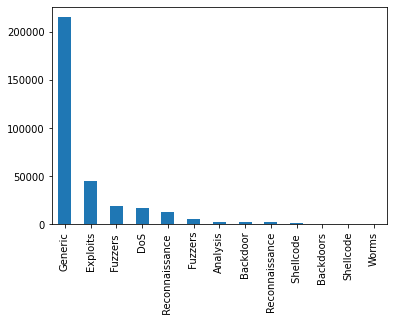

In [27]:
all_data['attack_cat'].value_counts().plot(kind="bar")


****

**Important**

In [28]:
all_data['attack_cat'].value_counts()

Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: attack_cat, dtype: int64

In [32]:
all_data['attack_cat']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
440039         NaN
440040         NaN
440041         NaN
440042         NaN
440043    Exploits
Name: attack_cat, Length: 2540047, dtype: object

In [33]:
all_data["attack_cat"].fillna('Normal', inplace = True)

to solve the problem => lower!!

In [36]:
all_data['attack_cat']=all_data['attack_cat'].apply(lambda x: x.strip().lower())

In [37]:
all_data['attack_cat']= all_data['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())

In [38]:
all_data['attack_cat'].value_counts()


normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: attack_cat, dtype: int64

In [39]:
all_data['state'].value_counts()

FIN    1478689
CON     560588
INT     490471
REQ       9043
RST        528
ECO        337
CLO        161
URH        108
ACC         43
PAR         30
TST          9
ECR          9
URN          8
no           8
MAS          8
TXD          7
Name: state, dtype: int64

In [ ]:
for i in cat_type:
    if(i in all_data[['attack_cat']]):
        print(yes)

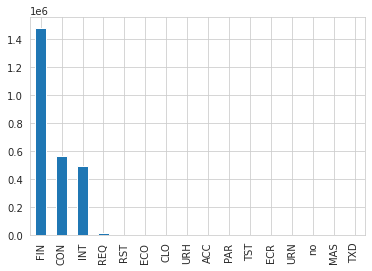

In [70]:
all_data['state'].value_counts().plot(kind="bar")
plt.savefig('Nombre et Type de State.png')

In [41]:
state_important=['FIN',
'CON',
'INT',
'REQ',
'RST']
B=all_data[all_data['state'].isin(state_important)]
#B['state','label','attack_cat']
C=B[['state','label','attack_cat']]
#C.plot(kind="bar")

In [42]:
C

Name,state,label,attack_cat
0,CON,0,normal
1,CON,0,normal
2,CON,0,normal
3,CON,0,normal
4,CON,0,normal
...,...,...,...
440039,FIN,0,normal
440040,CON,0,normal
440041,CON,0,normal
440042,CON,0,normal


In [43]:
set(all_data["attack_cat"])

{'analysis',
 'backdoor',
 'dos',
 'exploits',
 'fuzzers',
 'generic',
 'normal',
 'reconnaissance',
 'shellcode',
 'worms'}

# STATE

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

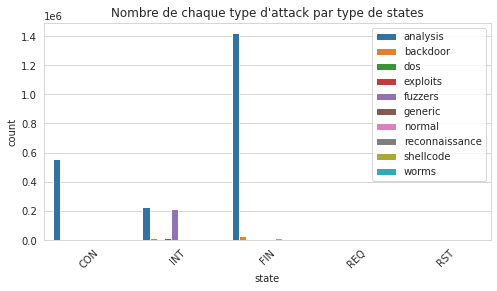

In [71]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='state', hue='attack_cat', data=C)
ax.legend(loc="upper right", labels=('analysis',
 'backdoor',
 'dos',
 'exploits',
 'fuzzers',
 'generic',
 'normal',
 'reconnaissance',
 'shellcode',
 'worms'))
ax.set_title("Nombre de chaque type d'attack par type de states")
plt.xticks(rotation=45)
plt.savefig("Nombre de chaque type d'attack par type de states.png")
plt.show()

 most occured attack data categories are "Generic", "Exploits", Fuzzers", "DoS" and "Reconnaissance"

In [ ]:
all_data['service'].value_counts().plot(kind="bar")

# SERVICE

In [73]:
D=A[['service','label','attack_cat']]
D

Name,service,label,attack_cat
0,dns,0,NaN
1,-,0,NaN
2,dns,0,NaN
3,dns,0,NaN
4,dns,0,NaN
...,...,...,...
440039,ftp-data,0,NaN
440040,ftp,0,NaN
440041,ftp,0,NaN
440042,http,0,NaN


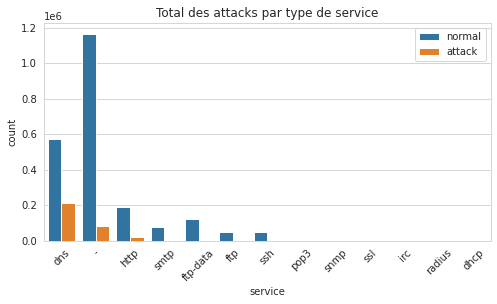

In [74]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='service', hue='label', data=D)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("Total des attacks par type de service")
plt.xticks(rotation=45)
plt.savefig("Total des attacks par type de service.png")
plt.show()
# replace - with (voir papier)

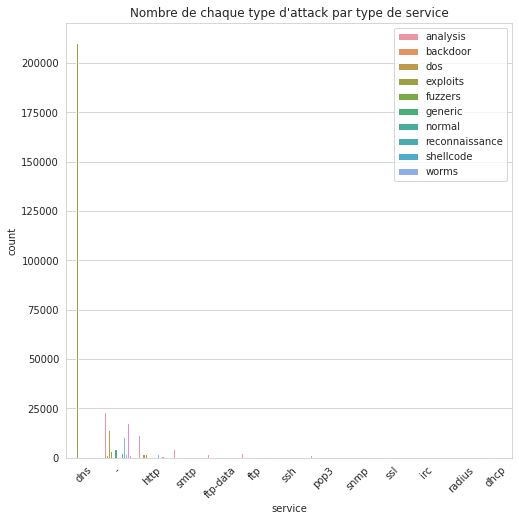

In [75]:
fig, ax = plt.subplots(figsize=(8,8))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='service', hue='attack_cat', data=D)
ax.legend(loc="upper right", labels=('analysis',
 'backdoor',
 'dos',
 'exploits',
 'fuzzers',
 'generic',
 'normal',
 'reconnaissance',
 'shellcode',
 'worms'))
ax.set_title("Nombre de chaque type d'attack par type de service")
plt.xticks(rotation=45)
plt.savefig("Nombre de chaque type d'attack par type de service.png")
plt.show()
# replace - with (voir papier)

In [76]:
def reduce_column(s, to_keep):
    """
    This function reduce categorical values of a given feature to values provided in to_keep list
    and make every other value "others"
    """
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

In [77]:
to_keep = ['dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3']
all_data['service_reduced'] = all_data['service'].apply(reduce_column, args=(to_keep,))

In [78]:
D=all_data[['service_reduced','label','attack_cat']]
D

Name,service_reduced,label,attack_cat
0,dns,0,normal
1,others,0,normal
2,dns,0,normal
3,dns,0,normal
4,dns,0,normal
...,...,...,...
440039,ftp-data,0,normal
440040,ftp,0,normal
440041,ftp,0,normal
440042,http,0,normal


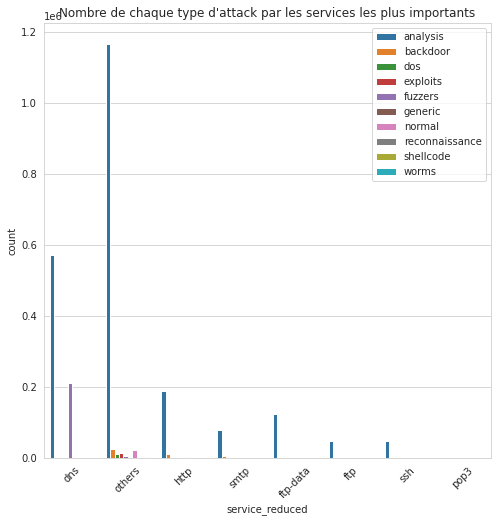

In [79]:
fig, ax = plt.subplots(figsize=(8,8))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='service_reduced', hue='attack_cat', data=D)
ax.legend(loc="upper right", labels=('analysis',
 'backdoor',
 'dos',
 'exploits',
 'fuzzers',
 'generic',
 'normal',
 'reconnaissance',
 'shellcode',
 'worms'))
ax.set_title("Nombre de chaque type d'attack par les services les plus importants")
plt.xticks(rotation=45)
plt.savefig("Nombre de chaque type d'attack par les services les plus importants.png")
plt.show()
# replace - with (voir papier)

# PROTOCOLE

In [80]:
A0=A['proto'].value_counts().nlargest(20).to_frame()
A0.index

Index(['tcp', 'udp', 'unas', 'arp', 'ospf', 'sctp', 'icmp', 'any', 'gre',
       'rsvp', 'ipv6', 'swipe', 'sun-nd', 'pim', 'mobile', 'sep', 'micp',
       'aes-sp3-d', 'encap', 'eigrp'],
      dtype='object')

In [81]:
liste_proto= A0.index
liste_proto

Index(['tcp', 'udp', 'unas', 'arp', 'ospf', 'sctp', 'icmp', 'any', 'gre',
       'rsvp', 'ipv6', 'swipe', 'sun-nd', 'pim', 'mobile', 'sep', 'micp',
       'aes-sp3-d', 'encap', 'eigrp'],
      dtype='object')

In [82]:
E=all_data[all_data['proto'].isin(liste_proto)]
E

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label,service_reduced
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,3,7,1,3,1,1,1,normal,0,dns
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,2,4,2,3,1,1,2,normal,0,others
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,12,8,1,2,2,1,1,normal,0,dns
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,6,9,1,1,1,1,1,normal,0,dns
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,7,9,1,1,1,1,1,normal,0,dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,1,2,3,3,1,1,3,normal,0,ftp-data
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,normal,0,ftp
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,4,2,2,2,2,normal,0,ftp
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,1,1,2,4,2,2,2,normal,0,http


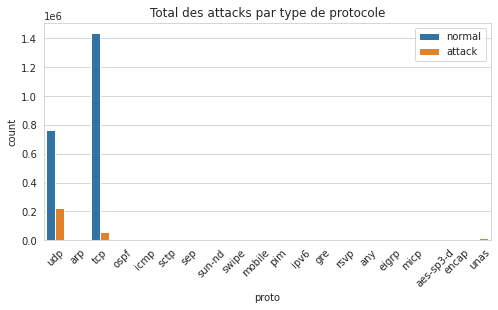

In [83]:
E=E[['proto','label','attack_cat']]
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='proto', hue='label', data=E)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("Total des attacks par type de protocole")
plt.xticks(rotation=45)
plt.savefig("Total des attacks par type de protocole.png")
plt.show()

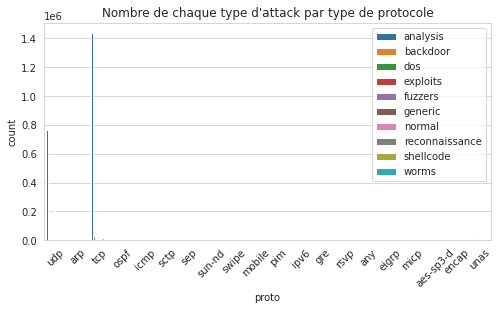

In [84]:
E=E[['proto','label','attack_cat']]
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='proto', hue='attack_cat', data=E)
ax.legend(loc="upper right", labels=('analysis',
 'backdoor',
 'dos',
 'exploits',
 'fuzzers',
 'generic',
 'normal',
 'reconnaissance',
 'shellcode',
 'worms'))
ax.set_title("Nombre de chaque type d'attack par type de protocole")
plt.xticks(rotation=45)
plt.savefig("Nombre de chaque type d'attack par type de protocole.png")
plt.show()

In [67]:
#-------------------------------------------------------------------------------#

SPLIT DATA

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
#y=all_data['label']
#x=all_data.drop(columns=['attack_cat','label'])
x,y = train_test_split(all_data, test_size=0.30, random_state=4 )

In [ ]:
print(x.shape,'\n',y.shape)

In [ ]:
x['label'].value_counts().plot(kind="bar")

in our training set => majority of "normal" attack_category

In [ ]:
x.info()

# PREPROCESSING DATA ON THE TRAIN !!

In [ ]:
x.isnull().sum()

on remplace null values par 0 pour les 2 features


In [ ]:
x["ct_flw_http_mthd"].fillna(0, inplace = True)
x["is_ftp_login"].fillna(0, inplace = True)


Que faire pour attack_cat ??


In [ ]:
x['attack_cat'].unique()

In [ ]:
x['label'].value_counts().plot(kind="bar")

On remarque qu'on a des labels 0 => cad il exite une catégorie "normal" !!

In [ ]:
x['attack_cat'].value_counts().plot(kind="bar")

In [ ]:
y['label'].value_counts().plot(kind="bar")

In [ ]:
y['attack_cat'].value_counts().plot(kind="bar")

In [ ]:
all_data['attack_cat'].value_counts().plot(kind="bar")

* so the missing values are "Normal" !!

In [ ]:
x["attack_cat"].fillna("Normal", inplace = True)


In [ ]:
x.isnull().sum()

# Adjusting the data types :

In [ ]:
x.dtypes

In [ ]:
# All the datatypes in our dataset
all_data.dtypes.value_counts()

In [ ]:
x['is_sm_ips_ports'].unique()

ct_ftp_cmd  is object neverthless according to the paper; it is an I (integer) so we will modify it

In [ ]:
x['ct_ftp_cmd'].unique()

In [ ]:
x['ct_ftp_cmd']=x['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

In [ ]:
x['ct_ftp_cmd'].unique()

In [ ]:
x['is_ftp_login'].unique() #But 'is_ftp_login' is binary !? 

In [ ]:
x

# Problem => for 2 and 4 replace them with 1 or 0 ??

# EDA :
* Correlation between features 

In [ ]:
def multi_corr(col1, col2="label", df=x):
    '''
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    #log_corr = df[col1].apply(np.log1p).corr(df[col2])

    #print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))
    print("Correlation : {}".format(corr))

def corr(col1, col2="label", df=x):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]




In [ ]:
# Plotting the correlation matrix of the dataset
# Refer: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
import matplotlib.pyplot as plt
import seaborn as sns
method = "pearson"
# correlation matrix
corr_mat = x.corr(method=method)

plt.figure(figsize=(12,12)) 
sns.heatmap(corr_mat, square=True)
plt.show()


A ANALYSER !

cool code !

In [ ]:
limit = 0.9

columns = corr_mat.columns
print(columns.shape)
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.9:
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='attack_cat', hue='label', data=x)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("train data")
plt.xticks(rotation=45)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set_style('whitegrid')
# countplot of the given column
ax = sns.countplot(x='proto', hue='label', data=x)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("train data")
plt.xticks(rotation=45)
plt.show()

In [ ]:
x['proto'].value_counts().head(15)

# Remove high correlation features 

In [ ]:


# Selecting all the features with high correlation values with other features

corr_matrix = x.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# We don't want to use these features for plotting because these are having high corr
# And most likely have same kind of plots with already plotted feature
print(to_drop)



In [ ]:
#useful for after
saved_dict=dict()
saved_dict['corr_col'] = to_drop


In [ ]:
x.drop(columns=to_drop, inplace=True)
x.shape

In [ ]:
y.shape

In [ ]:
x_train, y_train = x.drop(columns=['label']), x['label']


In [ ]:
x_test, y_test = y.drop(columns=['label']), y['label']

In [ ]:
saved_dict['to_drop'] = ['attack_cat']

# Standardize numerical columns

In [ ]:
cat_cols2=[i for i in x_train.columns if x_train.dtypes[i]=='object']
cat_cols2
print(len(cat_cols2),cat_cols2)

In [ ]:
saved_dict['cat_col'] = cat_cols2


In [ ]:
num_cols2=[i for i in x_train.columns if x_train.dtypes[i]!='object']
num_cols2
print(len(num_cols2),num_cols2)

In [ ]:
num_col = list(set(x_train.columns) - set(cat_cols2))
len(num_col)

In [ ]:
saved_dict['num_col'] = num_cols2

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(x_train[num_cols2])

x_train[num_cols2] = scaler.transform(x_train[num_cols2])

x_train.head()



# [](http://)For categorical columns we'll use One hot encoding:
Given a dataset with two features, we let the encoder find the unique values per feature and transform the data to a binary one-hot encoding.

In [ ]:
x_train2=x_train.copy()

In [ ]:
x_train2.head()

prob de data memory => i will delete some values of all_data['service','proto','state']

In [ ]:
x_train2.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
service = OneHotEncoder()
proto= OneHotEncoder()
state = OneHotEncoder()
ohe_service = service.fit(x_train2.service.values.reshape(-1,1))
ohe_proto = proto.fit(x_train2.proto.values.reshape(-1,1))
ohe_state = state.fit(x_train2.state.values.reshape(-1,1))
print(x_train2['proto'], x_train2['proto'].values.reshape(-1,1))
# We are onehot encoding the given column
# Remove the original categorical column




In [ ]:
x_train2 = x_train2.loc[~x_train2.index.duplicated(keep='first')]

In [ ]:
for col, ohe in zip(['proto', 'service', 'state'], [ohe_proto, ohe_service, ohe_state]):
    x = ohe.transform(x_train2[col].values.reshape(-1,1))
    tmp_df = pd.DataFrame(x.todense(), columns=[col+'_'+i for i in ohe.categories_[0]])
    x_train2=x_train2.drop(col, axis=1)
    x_train3 = pd.concat([x_train2, tmp_df], axis=1)

x_train3.head()

In [ ]:
x_train.head()

In [ ]:
all_data[['proto']].value_counts()

def standardize(data):
    '''
    Stanardize the given data. Performs mean centering and varience scaling.
    Using stanardscaler object trained on train data.
    '''
    data[saved_dict['num_col']] = scaler.transform(data[saved_dict['num_col']])
    return data

def ohencoding(data):
    '''
    Onehot encoding the categoricla columns.
    Add the ohe columns with the data and removes categorical columns.
    Using Onehotencoder objects trained on train data.
    '''

    # Onehot encoding cat col using onehotencoder objects
    X = ohe_service.transform(data['service'].values.reshape(-1, 1))
    Xm = ohe_proto.transform(data['proto'].values.reshape(-1, 1))
    Xmm = ohe_state.transform(data['state'].values.reshape(-1, 1))
    
    # Adding encoding data to original data
    data = pd.concat([data,
                      pd.DataFrame(Xm.toarray(), columns=['proto_'+i for i in ohe_proto.categories_[0]]),
                      pd.DataFrame(X.toarray(), columns=['service_'+i for i in ohe_service.categories_[0]]),
                      pd.DataFrame(Xmm.toarray(), columns=['state_'+i for i in ohe_state.categories_[0]])],
                      axis=1)
    
    # Removing cat columns
    data.drop(['proto', 'service', 'state'], axis=1, inplace=True)

    return data



file_path= 'final/'

import pickle
# Parametrs
saved_dict = pickle.load(open(file_path+'saved_dict.pkl', 'rb'))
# Mode value of all the columns
mode_dict = pickle.load(open(file_path+'mode_dict.pkl', 'rb'))
# Stanardscaler object
scaler = pickle.load(open(file_path+'scaler.pkl', 'rb'))
# One hot encoder objects
ohe_proto = pickle.load(open(file_path+'ohe_proto.pkl', 'rb'))
ohe_service = pickle.load(open(file_path+'ohe_service.pkl', 'rb'))
ohe_state = pickle.load(open(file_path+'ohe_state.pkl', 'rb'))



In [ ]:
x_train3.columns.value_counts().plot(kind="bar")

In [ ]:
import pickle
file_path = './'

pickle.dump(scaler, open(file_path+'scaler.pkl', 'wb'))  # Standard scaler
pickle.dump(saved_dict, open(file_path+'saved_dict.pkl', 'wb'))  # Dictionary with important parameters
#pickle.dump(mode_dict, open(file_path+'mode_dict.pkl', 'wb'))  #  Dictionary with most frequent values of columns

# Onehot encoder for categorical columns
pickle.dump(ohe_proto, open(file_path+'ohe_proto.pkl', 'wb'))
pickle.dump(ohe_service, open(file_path+'ohe_service.pkl', 'wb'))
pickle.dump(ohe_state, open(file_path+'ohe_state.pkl', 'wb'))

# Cleaned and processed train data
pickle.dump((x_train3, y_train), open(file_path+'final_train.pkl', 'wb'))



Pipeline functions

We have to prepare a pipeline, where we can send raw data and get the output.

We will use test data to implement the pipeline. Here we will use all the parameters we have saved using train data.

Also standardize and onehot encode test data using train data objects for standardscaler and onehotencoder.

In [ ]:
# mode values of every features, will use to fill Null values of test


In [ ]:
x_test=x_test.drop(['ct_ftp_cmd'], axis=1)
x_test

In [ ]:



def clean_data(data):
    '''
    Cleans given raw data. Performs various cleaning, removes Null and wrong values.
    Check for columns datatype and fix them.
    '''
    numerical_col = data.select_dtypes(include=np.number).columns  # All the numerical columns list
    categorical_col = data.select_dtypes(exclude=np.number).columns  # All the categorical columns list
    
    # Cleaning the data
    for col in data.columns:
        
        data[col] = data[col].fillna(0)
        data[col] = data[col].replace(' ', None)
        data[col] = data[col].apply(lambda x:"None" if x=="-" else x)

        # Fixing binary columns
        #if col in saved_dict['binary_col']:
         #   data[col] = np.where(data[col]>1, val, data[col])

    # Fixing datatype of columns
    bad_dtypes = list(set(categorical_col) - set(saved_dict['cat_col']))
    print(bad_dtypes)
    for bad_col in bad_dtypes:
        try:
            data[col] = data[col].astype(float)
        except:
            print('error')
           
    
    return data



In [ ]:
saved_dict['num_col']

In [ ]:
x_test, y_test = y.drop(columns=['label']), y['label']


In [ ]:
x_test

In [ ]:
saved_dict['num_col']

In [ ]:
for i in saved_dict['num_col']:
    print(i)


In [ ]:
saved_dict['num_col'][27]

In [ ]:
saved_dict #['num_col']]
del saved_dict['num_col'][27]

In [ ]:
def standardize(data):
    '''
    Stanardize the given data. Performs mean centering and varience scaling.
    Using stanardscaler object trained on train data.
    '''
    data[saved_dict['num_col']] = scaler.transform(data[saved_dict['num_col']])
    return data

def ohencoding(data):
    '''
    Onehot encoding the categoricla columns.
    Add the ohe columns with the data and removes categorical columns.
    Using Onehotencoder objects trained on train data.
    '''

    # Onehot encoding cat col using onehotencoder objects
    X = ohe_service.transform(data['service'].values.reshape(-1, 1))
    Xm = ohe_proto.transform(data['proto'].values.reshape(-1, 1))
    Xmm = ohe_state.transform(data['state'].values.reshape(-1, 1))
    
    # Adding encoding data to original data
    data = pd.concat([data,
                      pd.DataFrame(Xm.toarray(), columns=['proto_'+i for i in ohe_proto.categories_[0]]),
                      pd.DataFrame(X.toarray(), columns=['service_'+i for i in ohe_service.categories_[0]]),
                      pd.DataFrame(Xmm.toarray(), columns=['state_'+i for i in ohe_state.categories_[0]])],
                      axis=1)
    
    # Removing cat columns
    data.drop(['proto', 'service', 'state'], axis=1, inplace=True)

    return data



In [ ]:
x_test.shape

In [ ]:
# Resetting index of test data
x_test.reset_index(drop=True, inplace=True)
x_test.columns

In [ ]:
x_test.head()

In [ ]:
saved_dict['corr_col']

In [ ]:
#x_test.columns = saved_dict['columns']


# Droping all the unwanted columns
dropable_col = saved_dict['to_drop'] + saved_dict['corr_col']
x_test.drop(columns=dropable_col, inplace=True)



In [ ]:
x_test=clean_data(x_test)

In [ ]:
x_test=x_test.drop(['ct_ftp_cmd'],axis=1)

In [ ]:
x_test = standardize(x_test)

x_test.head()



In [ ]:
x_test[saved_dict['num_col']].info()

In [ ]:
x_test = ohencoding(x_test)

In [ ]:
x_test = standardize(x_test)

In [ ]:
x_test[saved_dict['num_col']].info()

In [ ]:
x_test['ct_ftp_cmd']

In [ ]:
x_test.columns

In [ ]:
x_train.columns